In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#loading the file
netflix_df= pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [20]:
#remove all tv shows
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [22]:
#sanity check
check = any(netflix_subset['type'] != 'Movie')
print(check)

False


In [24]:
netflix_subset['genre']

1              Dramas
2       Horror Movies
3              Action
4              Dramas
6       Horror Movies
            ...      
7781         Children
7782           Dramas
7783           Dramas
7784    Documentaries
7786    Documentaries
Name: genre, Length: 5377, dtype: object

In [43]:
# keep certain columns
columns_to_keep = ['title', 'country', 'genre', 'release_year', 'duration']
netflix_movies = netflix_subset[columns_to_keep]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [41]:
#filter movies with duration <= 60mins
short_movies = netflix_movies[netflix_movies['duration'] < 60]

#filter further for documentaries
documentaries = short_movies[short_movies['genre'] == "Documentaries"]
perc = len(documentaries)*100/len(short_movies)
print('Out of the', len(short_movies), 'short movies, ', perc,'% are documentaries')

short_movies.head()

Out of the 420 short movies,  35.95238095238095 % are documentaries


,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


In [53]:
#color assignment to differrent genres
netflix_movies.head()

colors = []

for index, rows in netflix_movies.iterrows():
    if rows['genre'] == 'Children':
        colors.append('blue')
    elif rows['genre']== 'Documentaries':
        colors.append('green')
    elif rows['genre'] == 'Stand-Up':
        colors.append('red')
    else:
        colors.append('pink')

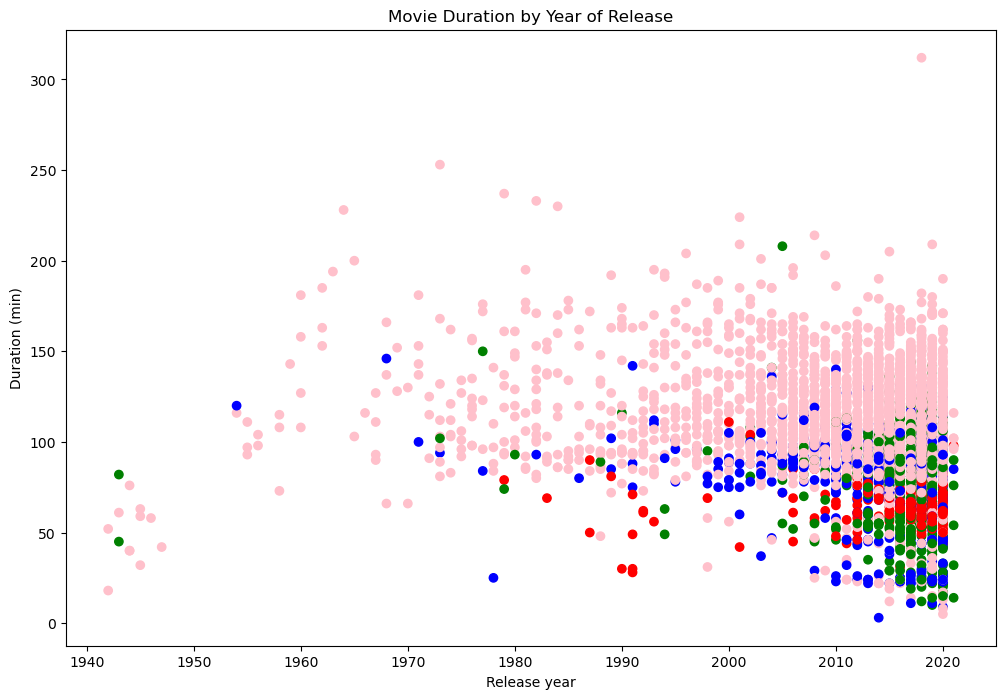

In [75]:
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)

plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')



plt.show()

In [76]:
# Are netflix movies getting shorter?
answer = 'maybe'
print(answer)

maybe
